<a href="https://colab.research.google.com/github/kurtsenol/machine-learning/blob/master/TopicModeling/Methodology/paper_method_analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import pandas as pd
import os
import io
from pathlib import Path
import numpy as np
import re
import shutil
import pickle


import seaborn as sns
import matplotlib.pyplot as plt

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
df_1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/Analysis of Turizm Journals raw 22.06.2020.xlsx", sheet_name=None, usecols="A:AF", header=1)
df_1.keys()
del df_1["General Information"]
df_1 = pd.concat(df_1)
df_1

AU  ... Unnamed: 31
IJCHM 0        Ineson, EM; Comic, D; Kalmic, L  ...         NaN
      1                    Benitez-Aurioles, B  ...         NaN
      2               Hu, XB; Yang, Y; Park, S  ...         NaN
      3    Ahmat, NHC; Arendt, SW; Russell, DW  ...         NaN
      4                    Kim, EL; Tanford, S  ...         NaN
...                                        ...  ...         ...
JHMM  226                           Morosan, C  ...         NaN
      227             Memarzadeh, F; Chang, HJ  ...         NaN
      228                       Cao, Y; Kim, K  ...         NaN
      229                                  NaN  ...         NaN
      230                                  NaN  ...         NaN

[3280 rows x 32 columns]

In [176]:
df_1 = df_1.dropna(how="all") 

In [177]:
df_1 = df_1.reset_index(level=0)

In [178]:
df_1.rename(columns={'level_0': 'JO'}, inplace=True)

In [179]:
df_1.reset_index(drop=True, inplace=True)

In [180]:
df_1

,JO,AU,TI,PY,DI,QUALITATIVE (0)\nQUANTITATIVE (1),Method,category,CMB,CMV,MB,MV,MSD,MR,SR,SED,MED,TSM,TLD,PSM,MSM,A,C,CBQO,DBQ,UEB,HSF,PSD,MV.1,GFS,DMLMF,SULMF,Unnamed: 31
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,0,pheneomenology,CMB-free,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,1,secondary data,CMB-free,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,0,review,CMB-free,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,1,experimental,CMB-free,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,JHMM,"de Leaniz, PMG; Rodriguez, IRD",Exploring the Antecedents of Hotel Customer Lo...,2015.0,10.1080/19368623.2014.891961,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3265,JHMM,"Prayag, G; Khoo-Lattimore, C; Sitruk, J",Casual Dining on the French Riviera: Examining...,2015.0,10.1080/19368623.2014.859114,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3266,JHMM,"Morosan, C",The Influence of DMO Advertising on Specific D...,2015.0,10.1080/19368623.2014.891962,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3267,JHMM,"Memarzadeh, F; Chang, HJ",Online Consumer Complaints About Southeast Asi...,2015.0,10.1080/19368623.2014.893222,0,content analysis,CMB-free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
df_1.isnull().sum()

JO                                      0
AU                                      0
TI                                      0
PY                                     19
DI                                      1
QUALITATIVE (0)\nQUANTITATIVE (1)       3
Method                                  0
category                                0
CMB                                   616
CMV                                   620
MB                                    617
MV                                    618
MSD                                   621
MR                                    623
SR                                    621
SED                                   623
MED                                   621
TSM                                   612
TLD                                   614
PSM                                   618
MSM                                   617
A                                     595
C                                     600
CBQO                              

In [182]:
df_1.drop("Unnamed: 31", axis=1, inplace=True)

In [183]:
df_1.columns

Index(['JO', 'AU', 'TI', 'PY', 'DI', 'QUALITATIVE (0)\nQUANTITATIVE (1)',
       'Method', 'category', 'CMB', 'CMV', 'MB', 'MV', 'MSD', 'MR', 'SR',
       'SED', 'MED', 'TSM', 'TLD', 'PSM', 'MSM', 'A', 'C', 'CBQO', 'DBQ',
       'UEB', 'HSF', 'PSD', 'MV.1', 'GFS', 'DMLMF', 'SULMF'],
      dtype='object')

In [184]:
df_1.rename(columns={'QUALITATIVE (0)\nQUANTITATIVE (1)':'QUANTITATIVE'}, inplace=True)

In [185]:
df_1.QUANTITATIVE.value_counts()

1                     2653
0                      610
BOTH(1)                  1
              1-0        1
              1-0        1
Name: QUANTITATIVE, dtype: int64

In [186]:
df_1.QUANTITATIVE.unique()

array([0, 1, 'BOTH(1)', '              1-0 ', '              1-0', nan],
      dtype=object)

In [187]:
df_1.loc[df_1.QUANTITATIVE.isin(['              1-0 ', '              1-0']), "QUANTITATIVE"]="BOTH(1)"

In [188]:
df_1.QUANTITATIVE.value_counts()

1          2653
0           610
BOTH(1)       3
Name: QUANTITATIVE, dtype: int64

In [189]:
sns.set()

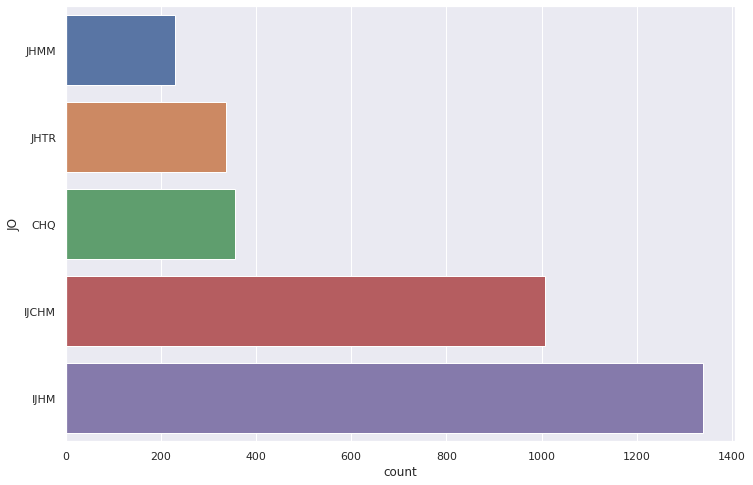

In [190]:
order = df_1.JO.value_counts(ascending=True).index
plt.figure(figsize=(12,8))
sns.countplot(y='JO', data=df_1, orient='h', order=order);

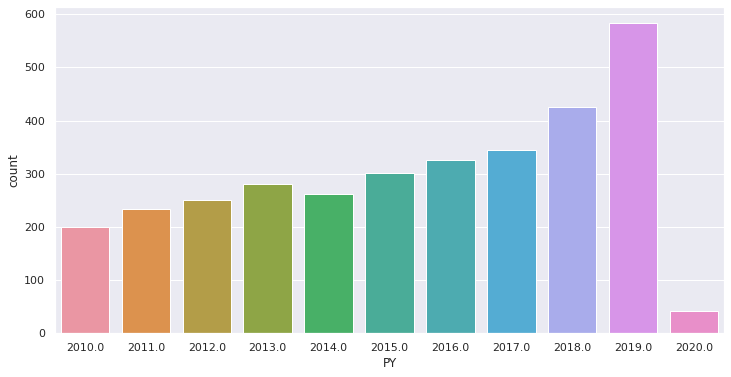

In [191]:
plt.figure(figsize=(12,6))
sns.countplot(x='PY', data=df_1, orient='v');

In [192]:
pd.crosstab(df_1.JO, df_1.PY, dropna=False)

PY,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
JO,,,,,,,,,,,
CHQ,35,47,31,35,35,33,33,28,34,29,13
IJCHM,56,53,52,55,63,86,115,137,172,217,2
IJHM,83,110,144,167,139,131,107,97,124,238,0
JHMM,0,0,0,0,0,35,42,44,42,40,14
JHTR,26,24,24,23,24,17,29,39,54,60,12


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3803: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


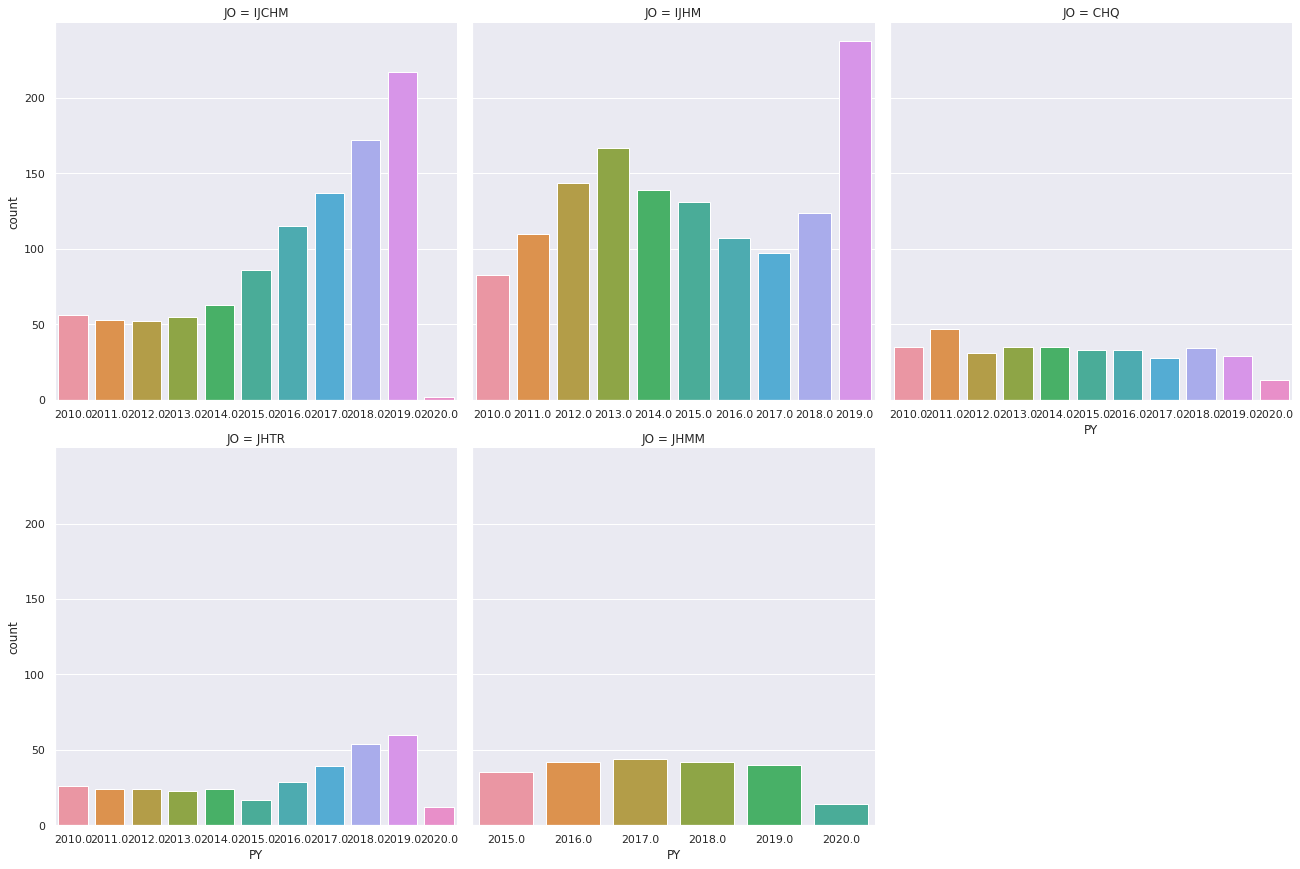

In [193]:
sns.set(font_scale=1)
sns.catplot(data=df_1, x='PY', col="JO", col_wrap=3, sharex=False, height=6, kind='count');

In [194]:
df_1.QUANTITATIVE.value_counts()

1          2653
0           610
BOTH(1)       3
Name: QUANTITATIVE, dtype: int64

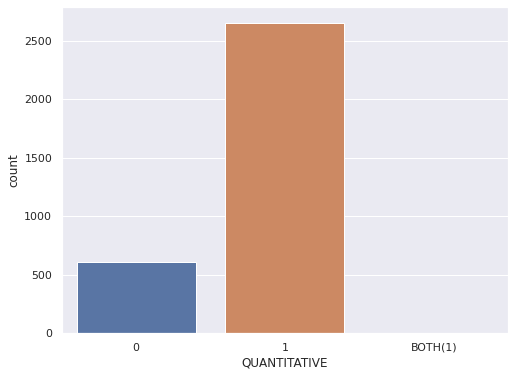

In [195]:
plt.figure(figsize=(8,6))
sns.countplot(x='QUANTITATIVE', data=df_1);

In [196]:
df_1.Method.value_counts().head(60)

survey                        1509
secondary data                 329
experimental                   305
panel                          206
qualitative                    187
review                         159
content analysis               109
mixed                          109
case study                     101
scale development               36
experiment                      36
theoretical                     32
grounded theory                 18
opinion                          9
bibliometrics                    9
panel                            8
pheneomenology                   8
bibliometric                     7
theoretical                      6
experiemental                    5
meta-analysis                    5
sna                              5
textual analysis                 4
survey                           4
ethnographic                     4
delphi                           4
scale development                3
mixed                            3
research note       

In [197]:
df_1["Method"] = df_1.Method.str.strip().str.lower()

In [198]:
m_sort = sorted(df_1.Method.unique())
m_sort

['bibliometric',
 'bibliometric analyses,co-citation analysis',
 'bibliometrics',
 'case study',
 'commentary',
 'content analysis',
 'delphi',
 'essay',
 'ethnographic',
 'ethnography',
 'etnografic',
 'etnographic',
 'experiemental',
 'experiment',
 'experimental',
 'field study',
 'grounded theory',
 'interview',
 'meta-analyis',
 'meta-analyses',
 'meta-analysis',
 'mixed',
 'mixed(exp+surv)',
 'mixed(int+ca)',
 'mixed(int+exp)',
 'netnography',
 'opinion',
 'panel',
 'phenemenology',
 'phenemology',
 'phenemonology',
 'pheneomenology',
 'phenomenology',
 'qualitative',
 'research note',
 'reviev',
 'review',
 'reviews',
 'scale development',
 'scale development (survey)',
 'scale devolopment',
 'secondary data',
 'sna',
 'surver',
 'survey',
 'survey+sd',
 'suvey',
 'textual analysis',
 'theoratical',
 'theoretica',
 'theoretical',
 'theoritical',
 'thereotical']

In [199]:
print(m_sort, len(m_sort))

['bibliometric', 'bibliometric analyses,co-citation analysis', 'bibliometrics', 'case study', 'commentary', 'content analysis', 'delphi', 'essay', 'ethnographic', 'ethnography', 'etnografic', 'etnographic', 'experiemental', 'experiment', 'experimental', 'field study', 'grounded theory', 'interview', 'meta-analyis', 'meta-analyses', 'meta-analysis', 'mixed', 'mixed(exp+surv)', 'mixed(int+ca)', 'mixed(int+exp)', 'netnography', 'opinion', 'panel', 'phenemenology', 'phenemology', 'phenemonology', 'pheneomenology', 'phenomenology', 'qualitative', 'research note', 'reviev', 'review', 'reviews', 'scale development', 'scale development (survey)', 'scale devolopment', 'secondary data', 'sna', 'surver', 'survey', 'survey+sd', 'suvey', 'textual analysis', 'theoratical', 'theoretica', 'theoretical', 'theoritical', 'thereotical'] 53


In [200]:
df_1 = df_1.replace(dict.fromkeys(['bibliometric', 'bibliometric analyses,co-citation analysis', 'bibliometrics'], 'bibliometric'))

df_1["Method"] = df_1["Method"].replace(dict.fromkeys(['ethnographic', 'ethnography', 'etnografic', 'etnographic', 'netnography'], 'ethnography'))

df_1["Method"] = df_1["Method"].replace(dict.fromkeys(['experiemental','experimental','experiment'], 'experimental'))

df_1["Method"] = df_1["Method"].replace(dict.fromkeys(['meta-analyis', 'meta-analyses', 'meta-analysis'], 'meta-analysis'))

df_1["Method"] = df_1["Method"].replace(dict.fromkeys(['mixed', 'mixed(exp+surv)', 'mixed(int+ca)', 'mixed(int+exp)'], 'mixed'))

df_1["Method"] = df_1["Method"].replace(dict.fromkeys(['phenemenology', 'phenemology', 'phenemonology', 'pheneomenology', 'phenomenology'], 'phenomenology'))

df_1["Method"] = df_1["Method"].replace(dict.fromkeys(['reviev', 'review', 'reviews'], 'review'))

df_1["Method"] = df_1["Method"].replace(dict.fromkeys(['scale development', 'scale development (survey)', 'scale devolopment'], 'scale development'))

df_1["Method"] = df_1["Method"].replace(dict.fromkeys(['surver', 'survey', 'survey+sd', 'suvey'], 'survey'))

df_1["Method"] = df_1["Method"].replace(dict.fromkeys(['theoratical', 'theoretica', 'theoretical', 'theoritical', 'thereotical'], 'theoretical'))

In [201]:
df_1["Method"].unique()

array(['phenomenology', 'secondary data', 'review', 'survey',
       'experimental', 'panel', 'content analysis', 'bibliometric',
       'qualitative', 'meta-analysis', 'delphi', 'mixed', 'case study',
       'theoretical', 'scale development', 'textual analysis',
       'ethnography', 'grounded theory', 'interview', 'research note',
       'sna', 'essay', 'opinion', 'commentary', 'field study'],
      dtype=object)

In [202]:
df_1["Method"].nunique()

25

In [203]:
df_1["Method"].value_counts()

survey               1517
experimental          348
secondary data        331
panel                 214
qualitative           187
review                162
mixed                 115
content analysis      110
case study            101
theoretical            46
scale development      41
bibliometric           18
grounded theory        18
phenomenology          15
ethnography             9
opinion                 9
meta-analysis           7
delphi                  5
sna                     5
textual analysis        4
commentary              2
research note           2
essay                   1
field study             1
interview               1
Name: Method, dtype: int64

In [204]:
df_1["Method"] = df_1["Method"].replace('panel', 'secondary data')

In [205]:
df_1["Method"].value_counts()

survey               1517
secondary data        545
experimental          348
qualitative           187
review                162
mixed                 115
content analysis      110
case study            101
theoretical            46
scale development      41
grounded theory        18
bibliometric           18
phenomenology          15
opinion                 9
ethnography             9
meta-analysis           7
delphi                  5
sna                     5
textual analysis        4
commentary              2
research note           2
essay                   1
field study             1
interview               1
Name: Method, dtype: int64

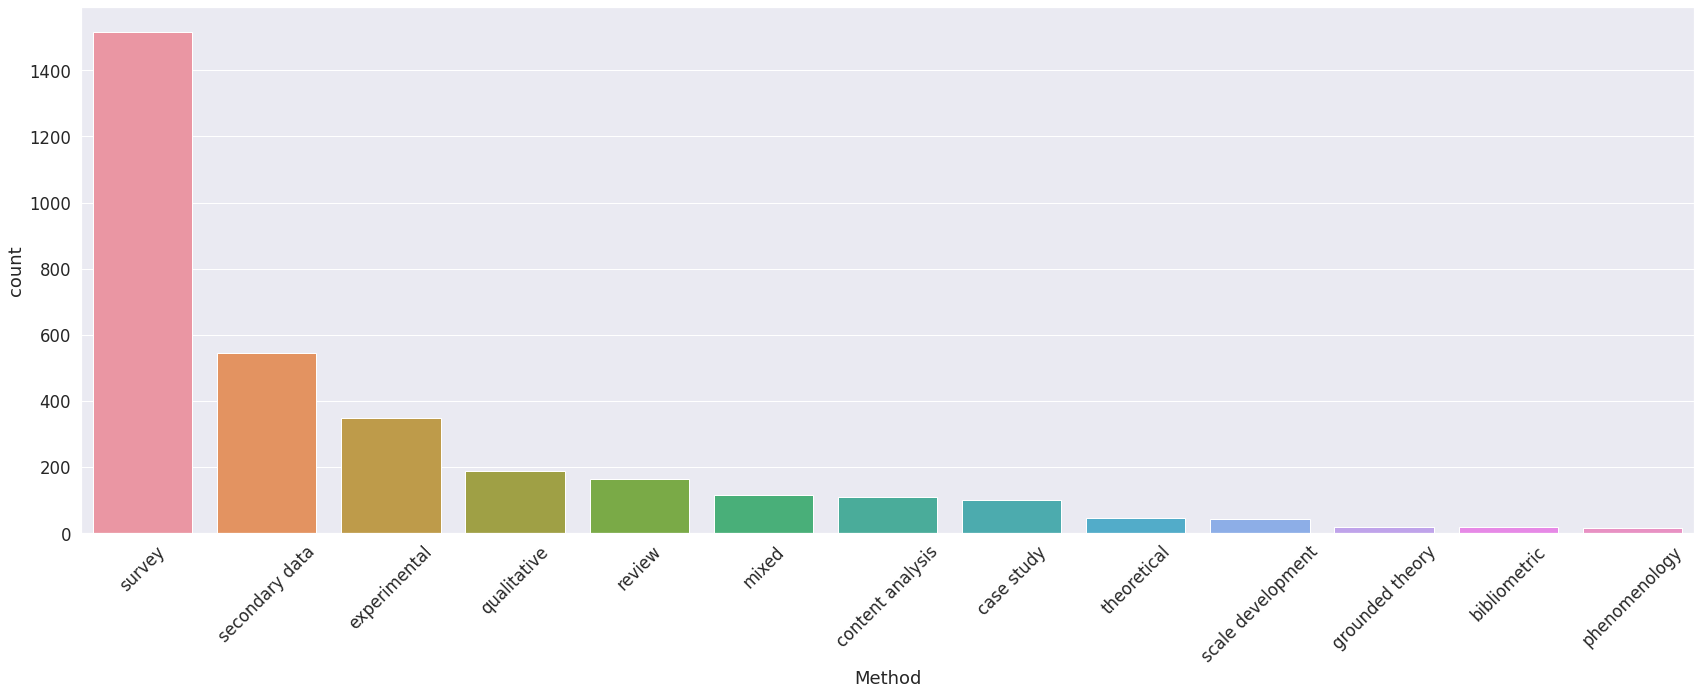

In [206]:
order = df_1.groupby('Method').filter(lambda x: len(x) >= 10)["Method"].value_counts().index
sns.set(font_scale=1.5)

plt.figure(figsize=(24,10))
sns.countplot(x='Method', data=df_1.groupby('Method').filter(lambda x: len(x) >= 10), order=order);

plt.xticks(rotation=45)
plt.tight_layout()

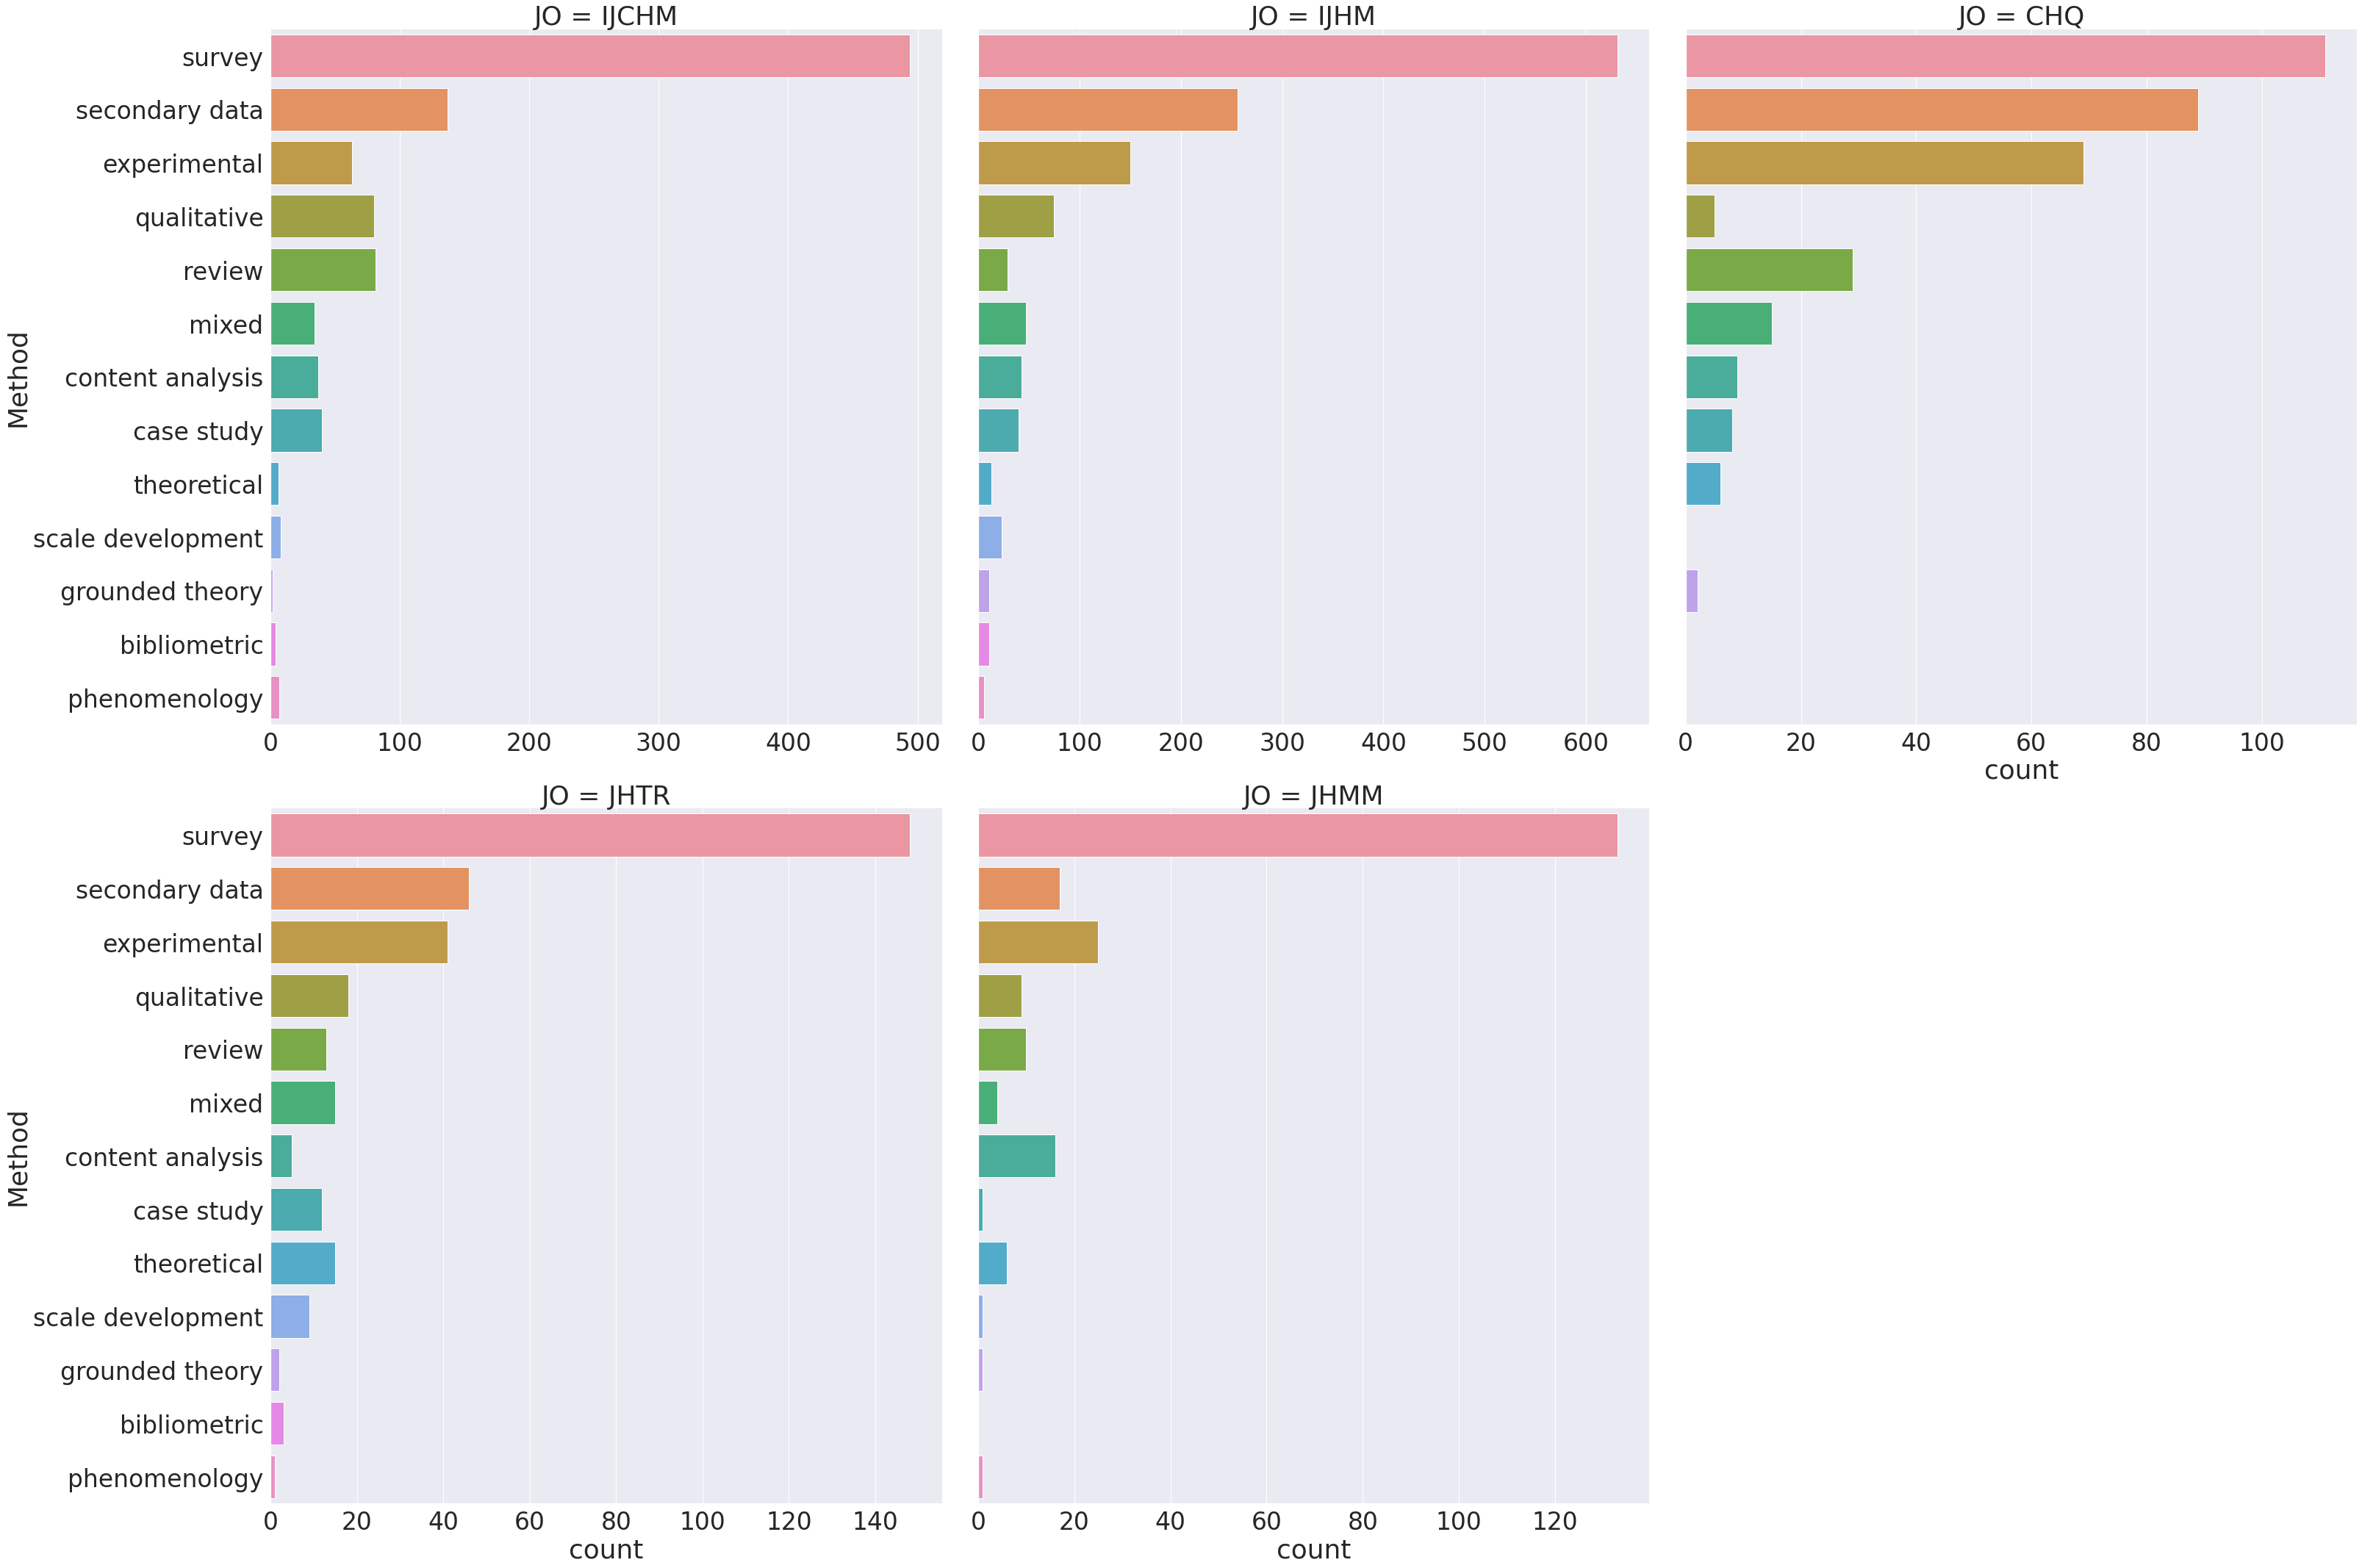

In [207]:
order = df_1.groupby('Method').filter(lambda x: len(x) >= 10)["Method"].value_counts().index
sns.set(font_scale=3)

# plt.figure(figsize=(40,25))

sns.catplot(y="Method", col="JO",
                data=df_1.groupby('Method').filter(lambda x: len(x) >= 10), kind="count", col_wrap=3,
                order=order, height=15, aspect=1, sharex=False);


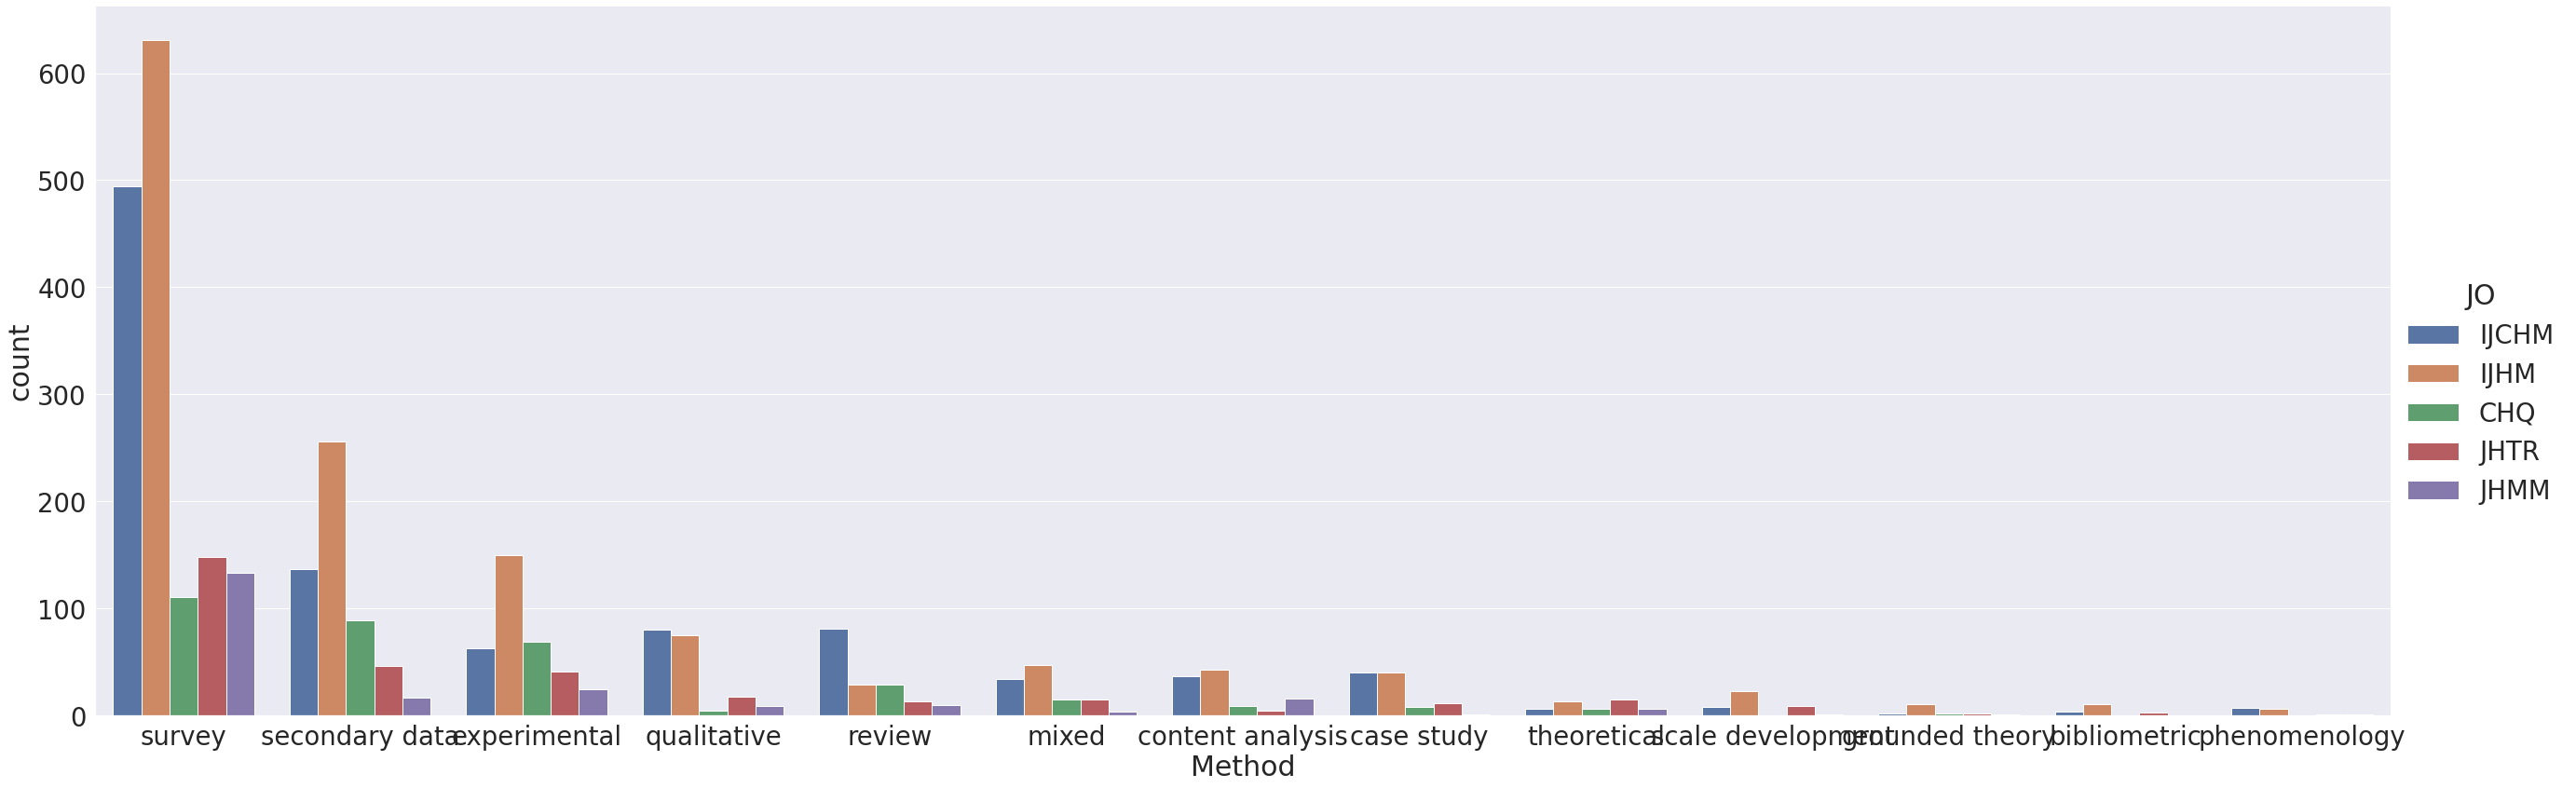

In [208]:
order = df_1.groupby('Method').filter(lambda x: len(x) >= 10)["Method"].value_counts().index
sns.set(font_scale=2.5)

# plt.figure(figsize=(40,25))

sns.catplot(x="Method", hue="JO",
                data=df_1.groupby('Method').filter(lambda x: len(x) >= 10), kind="count", 
                order=order, height=12, aspect=3);

In [209]:
df_filtered = df_1.groupby('Method').filter(lambda x: len(x) >= 10)
df_filtered

,JO,AU,TI,PY,DI,QUANTITATIVE,Method,category,CMB,CMV,MB,MV,MSD,MR,SR,SED,MED,TSM,TLD,PSM,MSM,A,C,CBQO,DBQ,UEB,HSF,PSD,MV.1,GFS,DMLMF,SULMF
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,0,phenomenology,CMB-free,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,1,secondary data,CMB-free,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,0,review,CMB-free,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,1,experimental,CMB-free,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,JHMM,"de Leaniz, PMG; Rodriguez, IRD",Exploring the Antecedents of Hotel Customer Lo...,2015.0,10.1080/19368623.2014.891961,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3265,JHMM,"Prayag, G; Khoo-Lattimore, C; Sitruk, J",Casual Dining on the French Riviera: Examining...,2015.0,10.1080/19368623.2014.859114,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3266,JHMM,"Morosan, C",The Influence of DMO Advertising on Specific D...,2015.0,10.1080/19368623.2014.891962,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3267,JHMM,"Memarzadeh, F; Chang, HJ",Online Consumer Complaints About Southeast Asi...,2015.0,10.1080/19368623.2014.893222,0,content analysis,CMB-free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
df_gr = df_filtered.groupby("JO")["Method"].value_counts()
df_gr

JO    Method           
CHQ   survey               111
      secondary data        89
      experimental          69
      review                29
      mixed                 15
                          ... 
JHTR  scale development      9
      content analysis       5
      bibliometric           3
      grounded theory        2
      phenomenology          1
Name: Method, Length: 61, dtype: int64

In [211]:
df_gr = df_gr.reset_index(name="Percentage")

In [212]:
df_gr

,JO,Method,Percentage
0,CHQ,survey,111
1,CHQ,secondary data,89
2,CHQ,experimental,69
3,CHQ,review,29
4,CHQ,mixed,15
...,...,...,...
56,JHTR,scale development,9
57,JHTR,content analysis,5
58,JHTR,bibliometric,3
59,JHTR,grounded theory,2


In [213]:
df_gr.groupby('JO')['Percentage'].transform(sum)

0     343
1     343
2     343
3     343
4     343
     ... 
56    328
57    328
58    328
59    328
60    328
Name: Percentage, Length: 61, dtype: int64

In [214]:
df_gr['Percentage'] = df_gr['Percentage'].div(df_gr.groupby('JO')['Percentage'].transform(sum))*100
print(df_gr)

      JO             Method  Percentage
0    CHQ             survey   32.361516
1    CHQ     secondary data   25.947522
2    CHQ       experimental   20.116618
3    CHQ             review    8.454810
4    CHQ              mixed    4.373178
..   ...                ...         ...
56  JHTR  scale development    2.743902
57  JHTR   content analysis    1.524390
58  JHTR       bibliometric    0.914634
59  JHTR    grounded theory    0.609756
60  JHTR      phenomenology    0.304878

[61 rows x 3 columns]


In [215]:
# sns.set(font_scale=1)

# plt.figure(figsize=(25,15))

# sns.barplot(x="Method", y="Percentage", data=df_gr, hue = "JO");

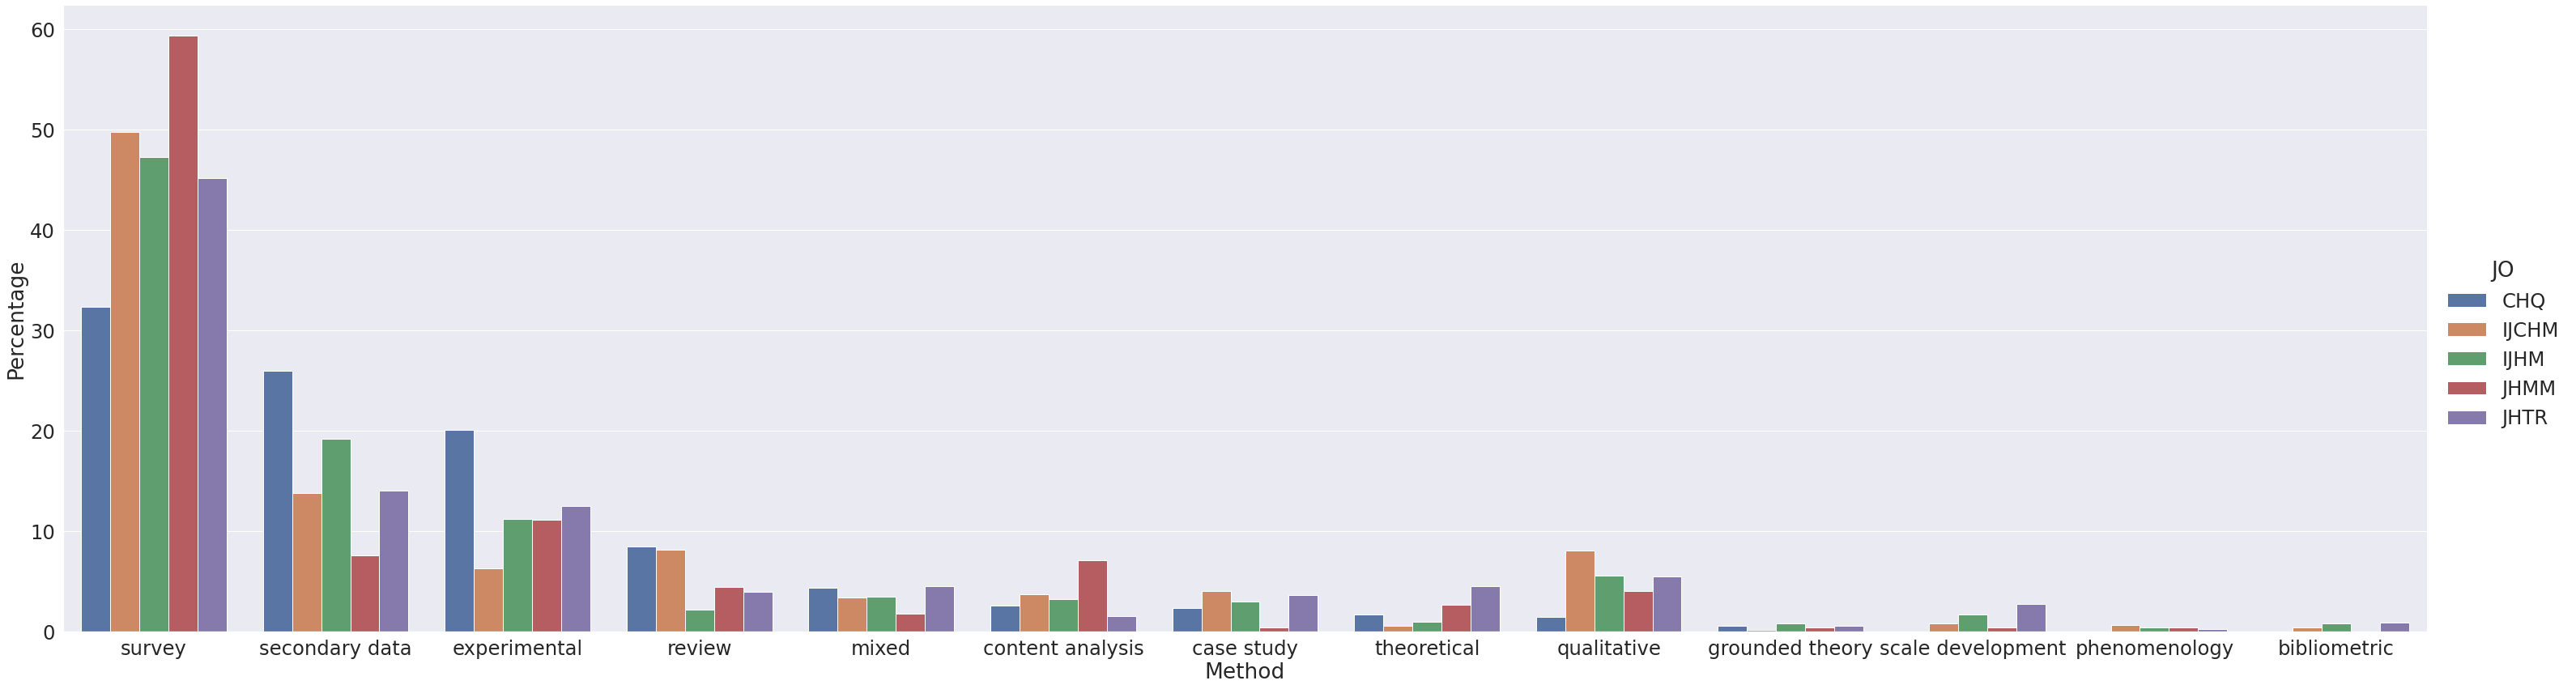

In [216]:
sns.set(font_scale=2.2)

sns.catplot(x="Method", y= "Percentage", hue="JO", data=df_gr, kind="bar", height=12, aspect=3.5);

In [217]:
df_new =df_1[~df_1.PY.isnull()].copy()
df_new

,JO,AU,TI,PY,DI,QUANTITATIVE,Method,category,CMB,CMV,MB,MV,MSD,MR,SR,SED,MED,TSM,TLD,PSM,MSM,A,C,CBQO,DBQ,UEB,HSF,PSD,MV.1,GFS,DMLMF,SULMF
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,0,phenomenology,CMB-free,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,1,secondary data,CMB-free,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,0,review,CMB-free,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,1,experimental,CMB-free,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,JHMM,"de Leaniz, PMG; Rodriguez, IRD",Exploring the Antecedents of Hotel Customer Lo...,2015.0,10.1080/19368623.2014.891961,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3265,JHMM,"Prayag, G; Khoo-Lattimore, C; Sitruk, J",Casual Dining on the French Riviera: Examining...,2015.0,10.1080/19368623.2014.859114,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3266,JHMM,"Morosan, C",The Influence of DMO Advertising on Specific D...,2015.0,10.1080/19368623.2014.891962,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3267,JHMM,"Memarzadeh, F; Chang, HJ",Online Consumer Complaints About Southeast Asi...,2015.0,10.1080/19368623.2014.893222,0,content analysis,CMB-free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
df_new["PY"] = df_new["PY"].astype("int")

In [219]:
df_2 = df_new.groupby(["JO", "PY", "Method"])["TI"].count().reset_index()
df_2

,JO,PY,Method,TI
0,CHQ,2010,case study,1
1,CHQ,2010,content analysis,1
2,CHQ,2010,experimental,1
3,CHQ,2010,grounded theory,1
4,CHQ,2010,opinion,7
...,...,...,...,...
428,JHTR,2019,theoretical,7
429,JHTR,2020,case study,1
430,JHTR,2020,qualitative,2
431,JHTR,2020,survey,8


In [220]:
df_2.TI.sum()

3250

In [221]:
df_2.Method.nunique()

24

In [233]:
df_filtered = df_1.groupby('Method').filter(lambda x: len(x) >= 100)

In [234]:
df_filtered.Method.nunique()

8

In [235]:
df_2 = df_2[df_2.Method.isin(df_filtered.Method)]

In [236]:
df_2.PY.describe()

count     318.000000
mean     2014.990566
std         2.968272
min      2010.000000
25%      2012.250000
50%      2015.000000
75%      2017.000000
max      2020.000000
Name: PY, dtype: float64

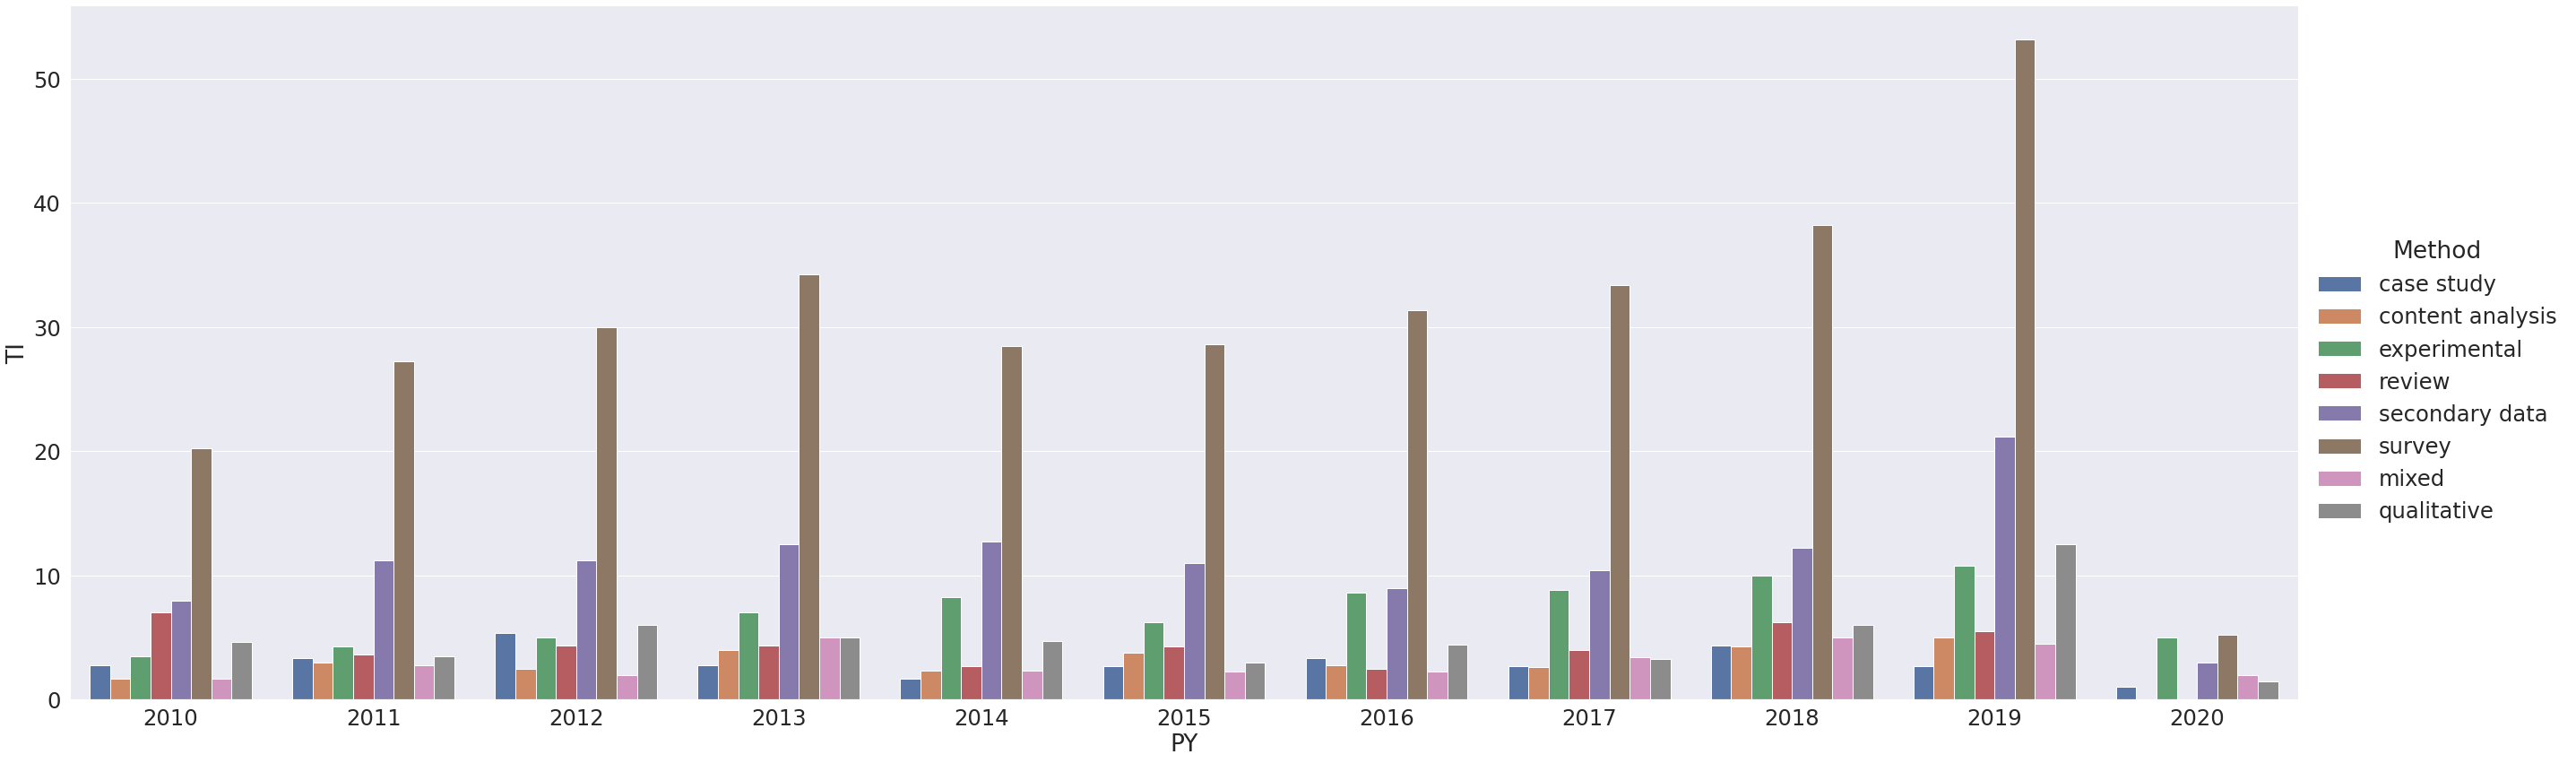

In [237]:
sns.set(font_scale=2.2)

sns.catplot(x="PY", y= "TI", hue="Method", data=df_2, kind="bar", height=12, aspect=3, ci=None);

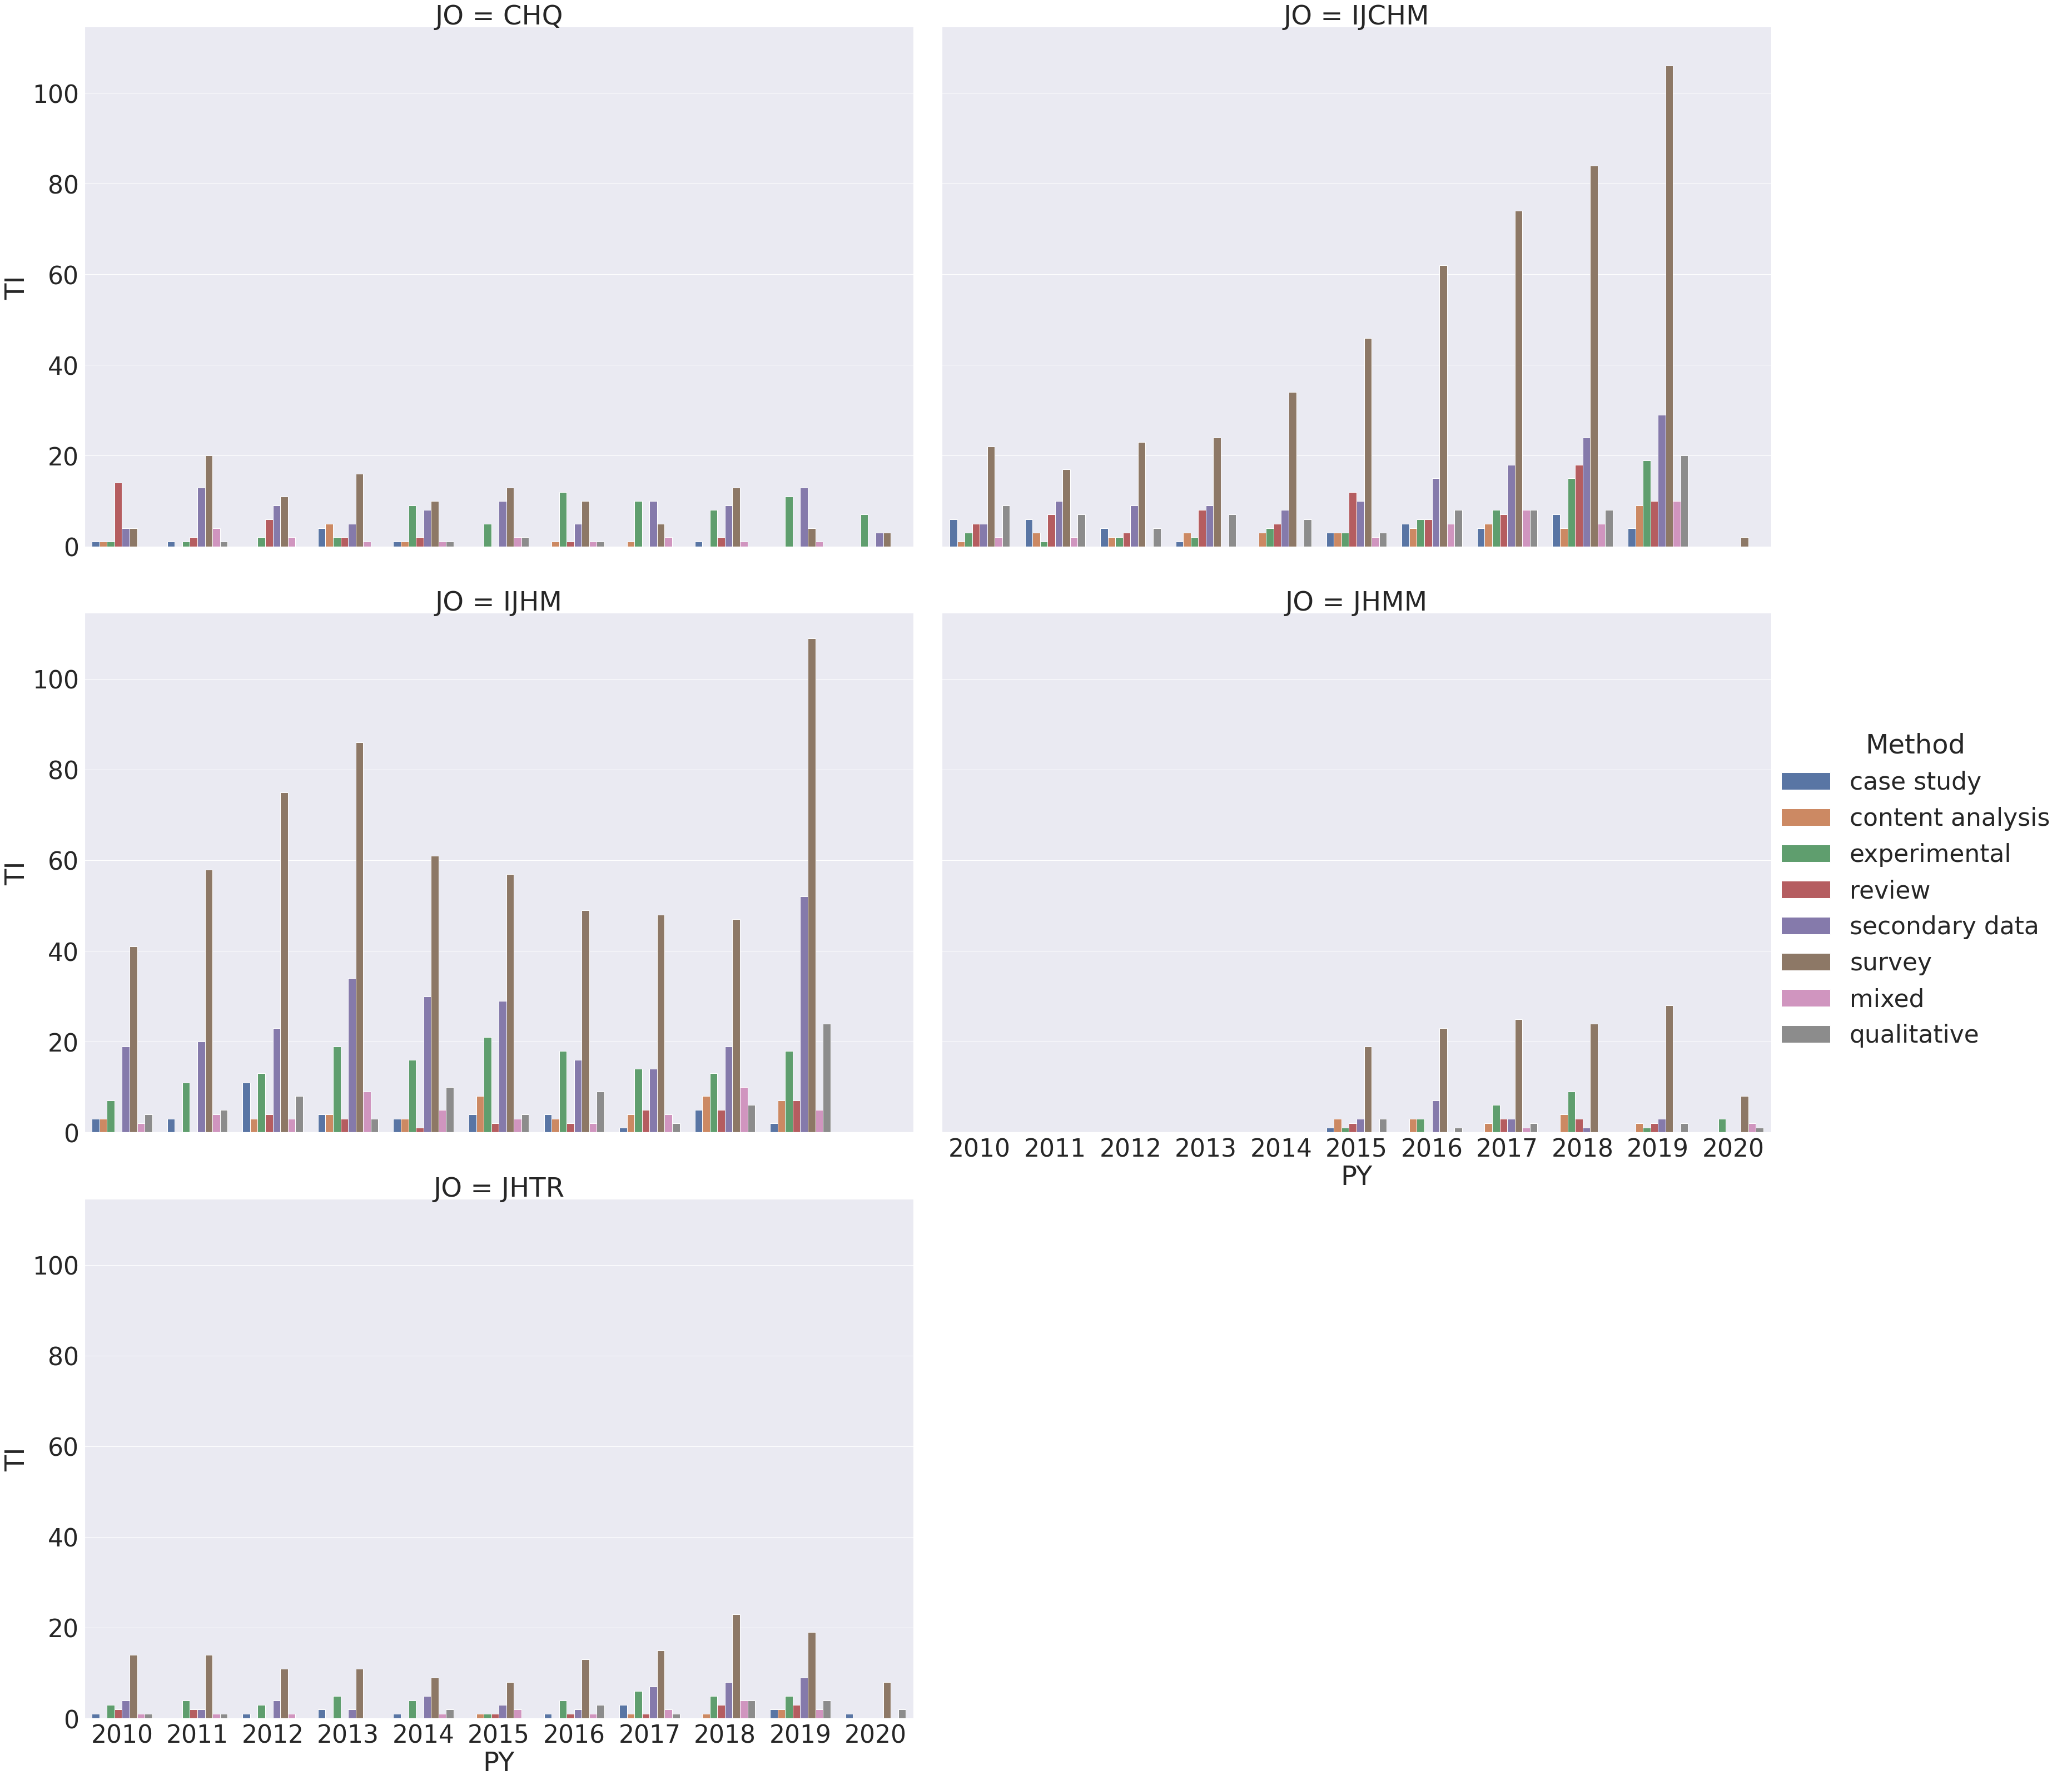

In [238]:
sns.set(font_scale=4)

sns.catplot(x="PY", y= "TI", hue="Method", data=df_2, col="JO", col_wrap=2, kind="bar", height=15, aspect=1.5, ci=None);

In [239]:
df_2

,JO,PY,Method,TI,Percentage
0,CHQ,2010,case study,1,2.857143
1,CHQ,2010,content analysis,1,2.857143
2,CHQ,2010,experimental,1,2.857143
5,CHQ,2010,review,14,40.000000
6,CHQ,2010,secondary data,4,11.428571
...,...,...,...,...,...
425,JHTR,2019,secondary data,9,15.000000
427,JHTR,2019,survey,19,31.666667
429,JHTR,2020,case study,1,8.333333
430,JHTR,2020,qualitative,2,16.666667


In [240]:
df_2.groupby(['JO', "PY"])['TI'].transform(sum)

0      25
1      25
2      25
5      25
6      25
       ..
425    46
427    46
429    11
430    11
431    11
Name: TI, Length: 318, dtype: int64

In [241]:
df_2['Percentage'] = df_2['TI'].div(df_2.groupby(['JO', "PY"])['TI'].transform(sum))*100
print(df_2)

       JO    PY            Method  TI  Percentage
0     CHQ  2010        case study   1    4.000000
1     CHQ  2010  content analysis   1    4.000000
2     CHQ  2010      experimental   1    4.000000
5     CHQ  2010            review  14   56.000000
6     CHQ  2010    secondary data   4   16.000000
..    ...   ...               ...  ..         ...
425  JHTR  2019    secondary data   9   19.565217
427  JHTR  2019            survey  19   41.304348
429  JHTR  2020        case study   1    9.090909
430  JHTR  2020       qualitative   2   18.181818
431  JHTR  2020            survey   8   72.727273

[318 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


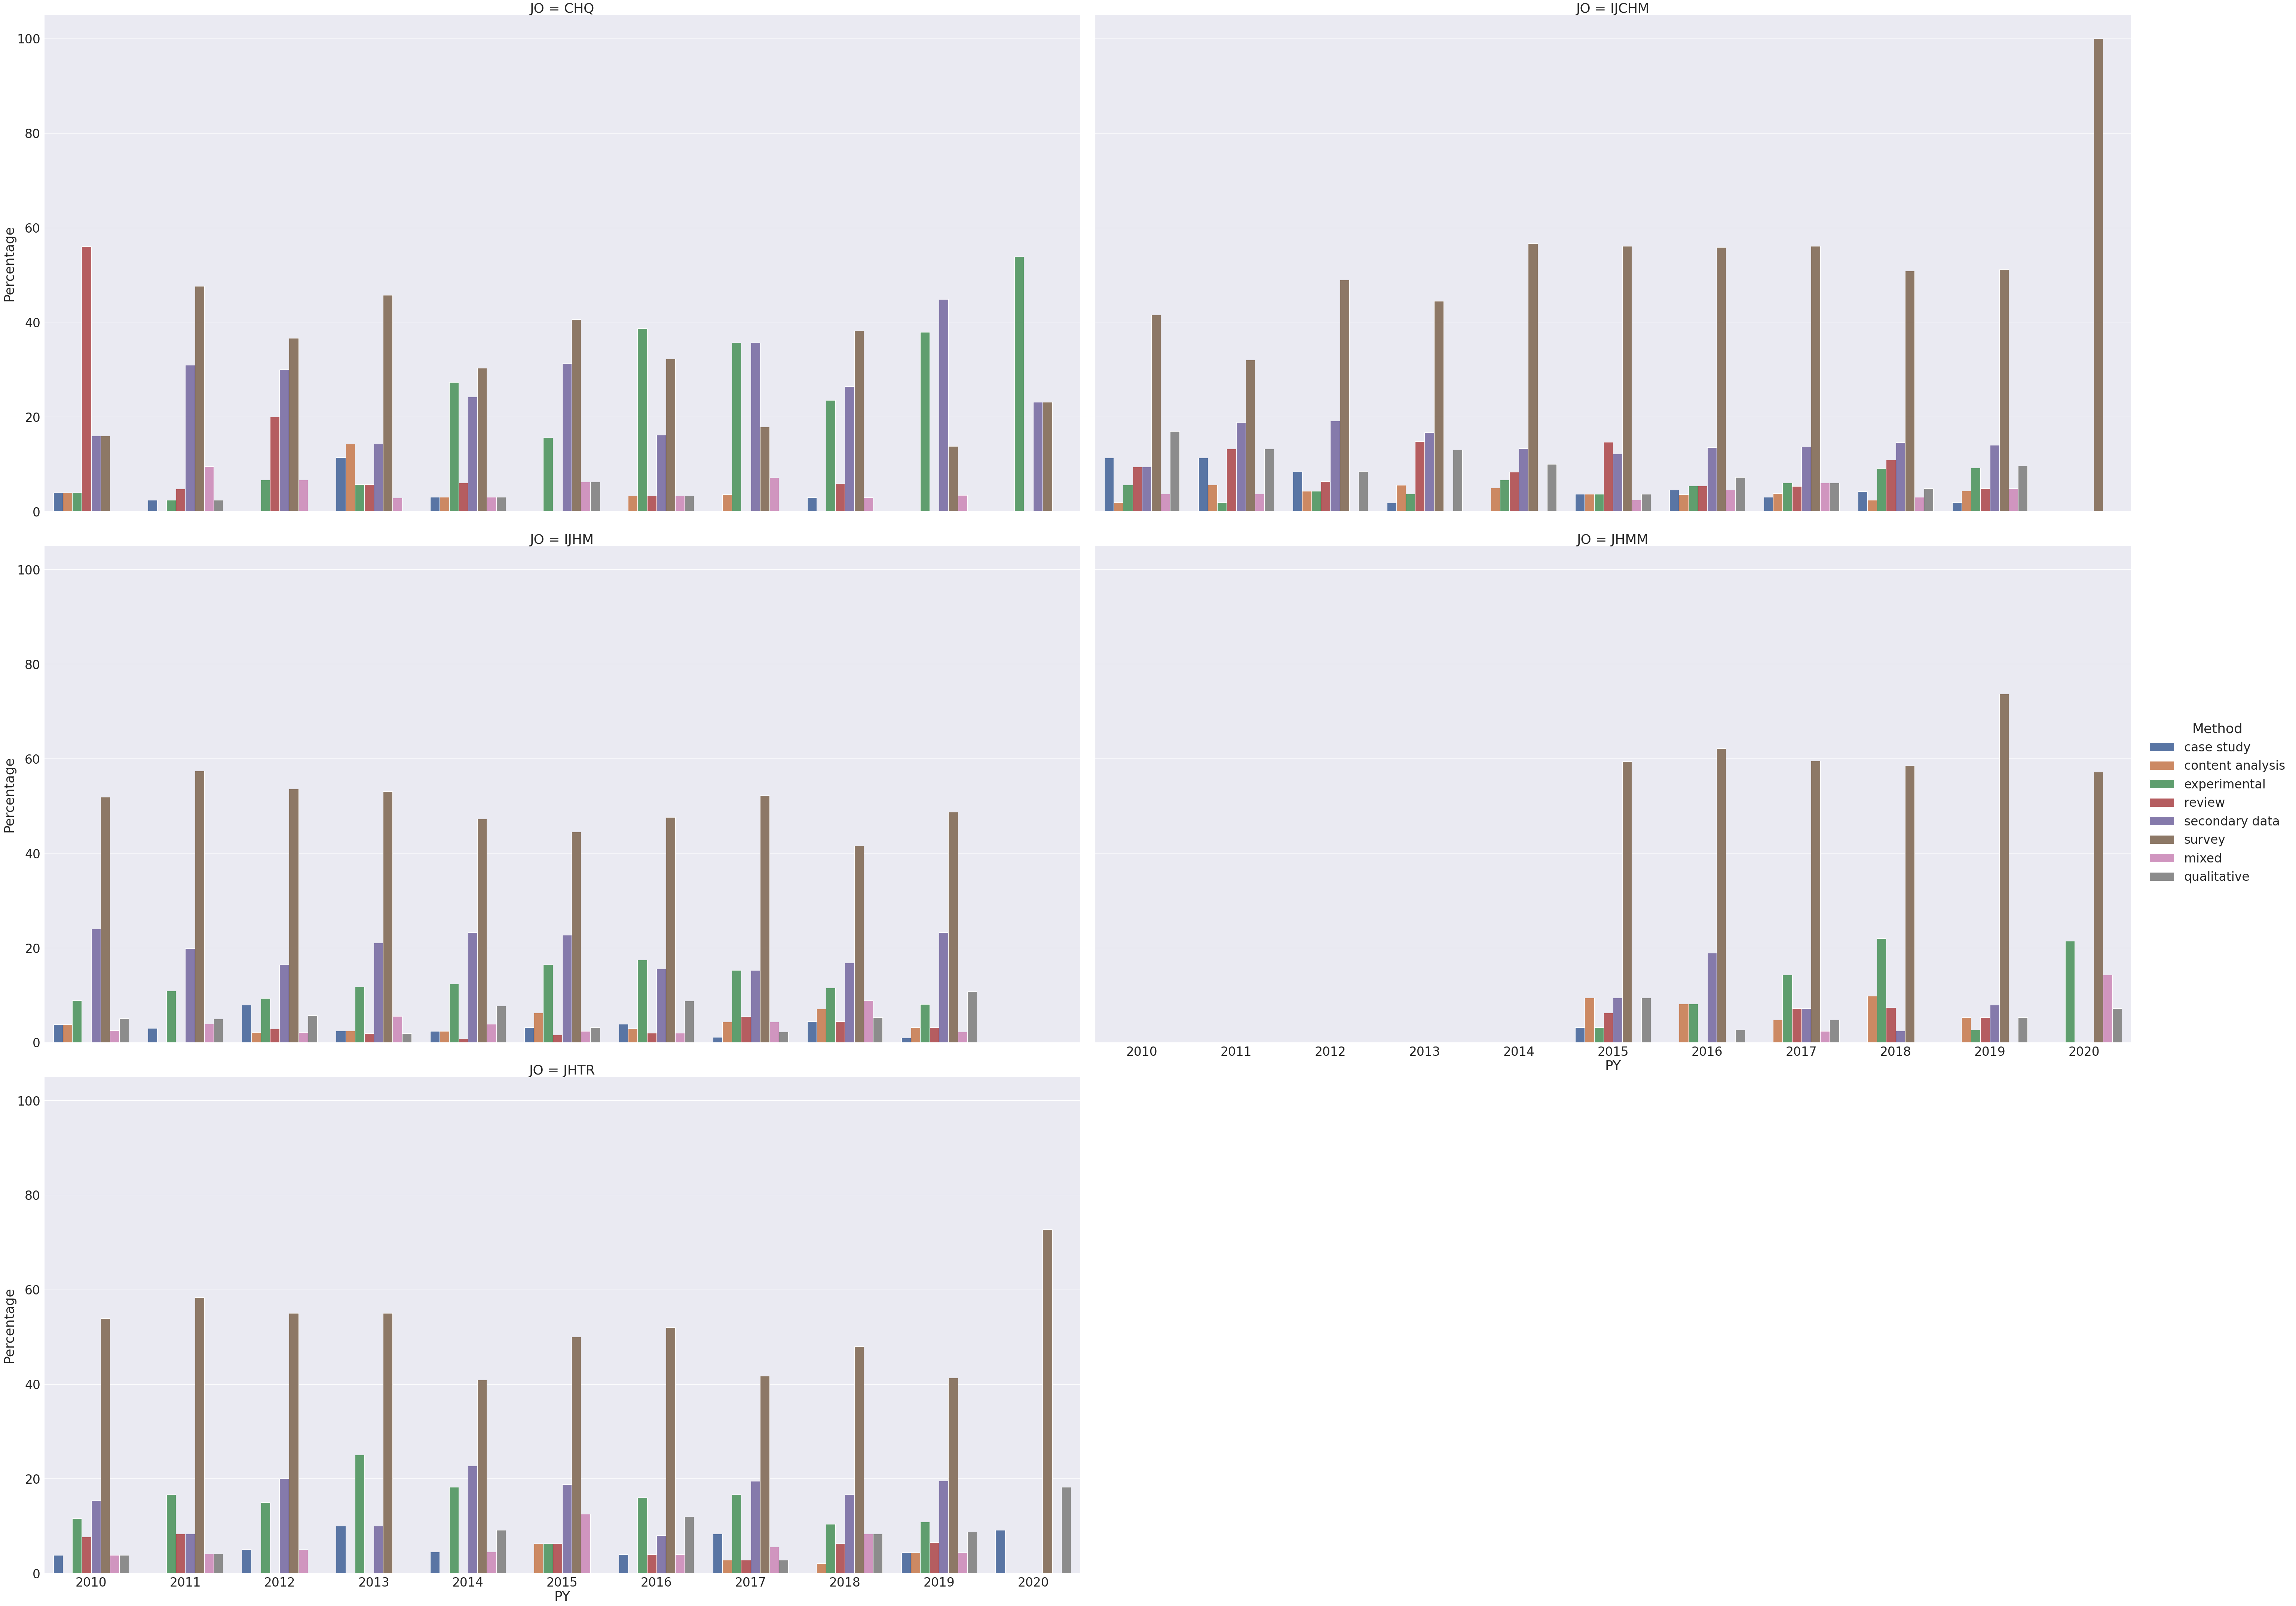

In [245]:
sns.set(font_scale=3)

sns.catplot(x="PY", y= "Percentage", hue="Method", data=df_2, col="JO", col_wrap=2, kind="bar", height=20, aspect=2, ci=None);

In [280]:
order = df_2.groupby("Method")["TI"].sum().sort_values(ascending=False).index.tolist()
order

['survey',
 'secondary data',
 'experimental',
 'qualitative',
 'review',
 'mixed',
 'content analysis',
 'case study']

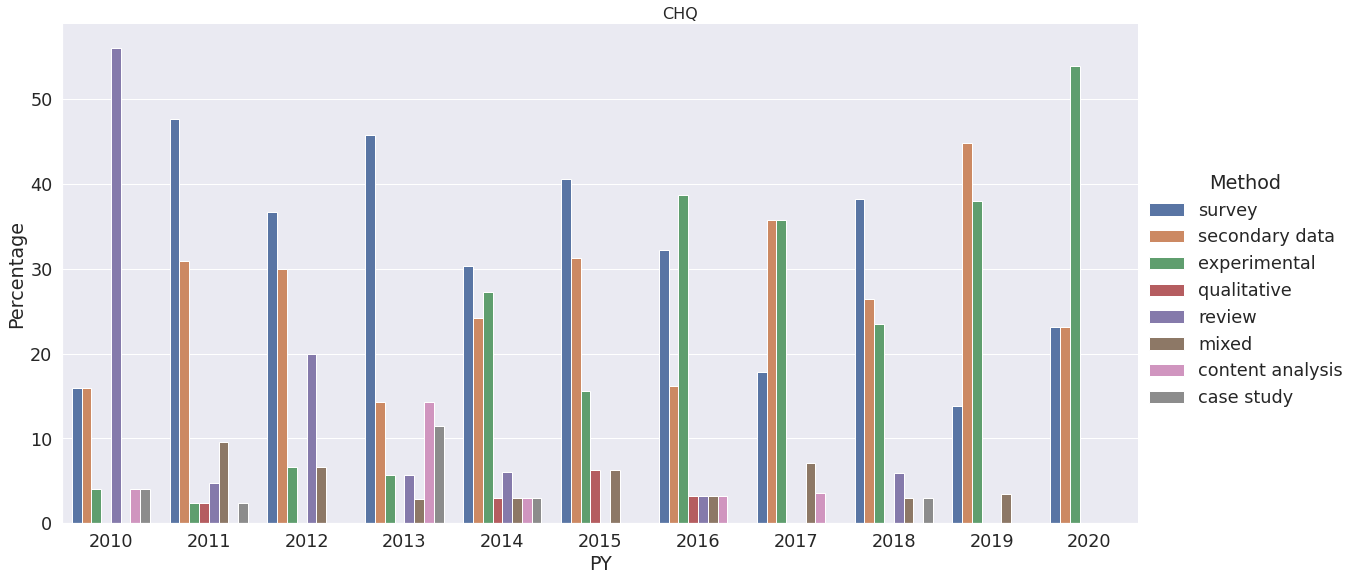

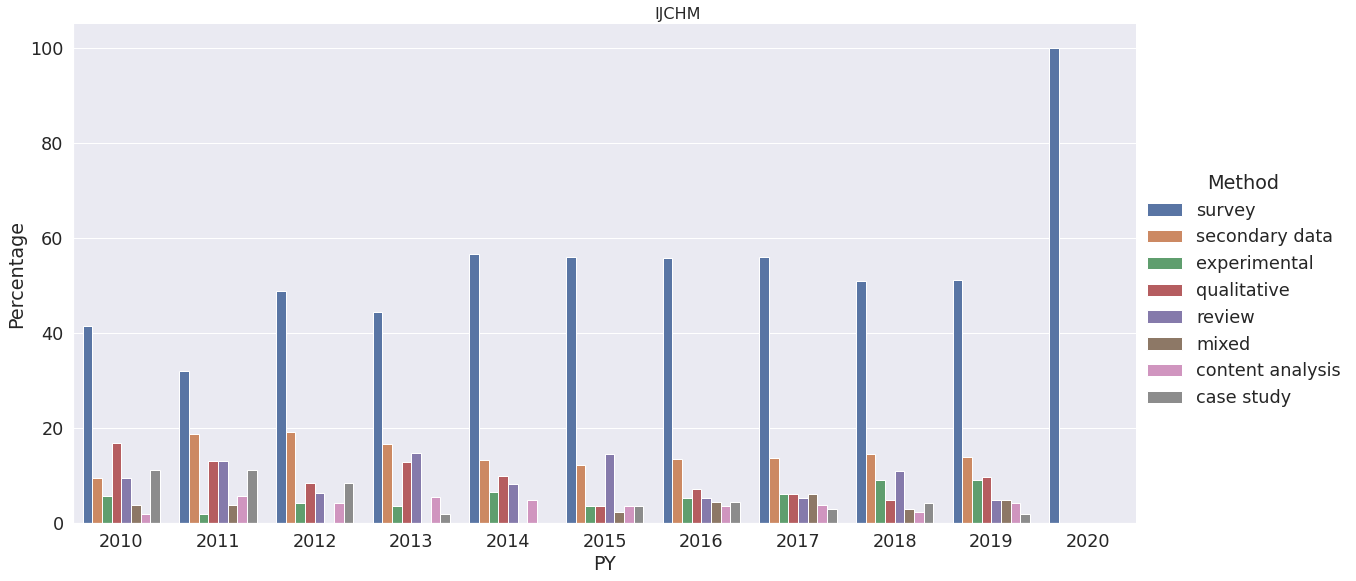

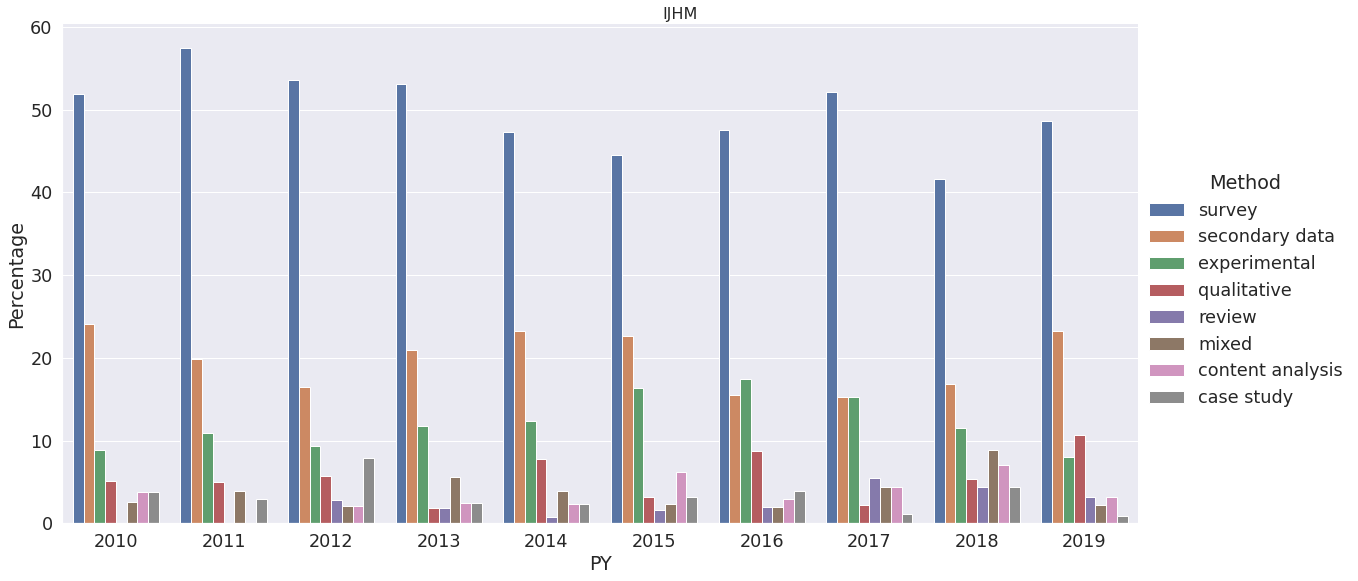

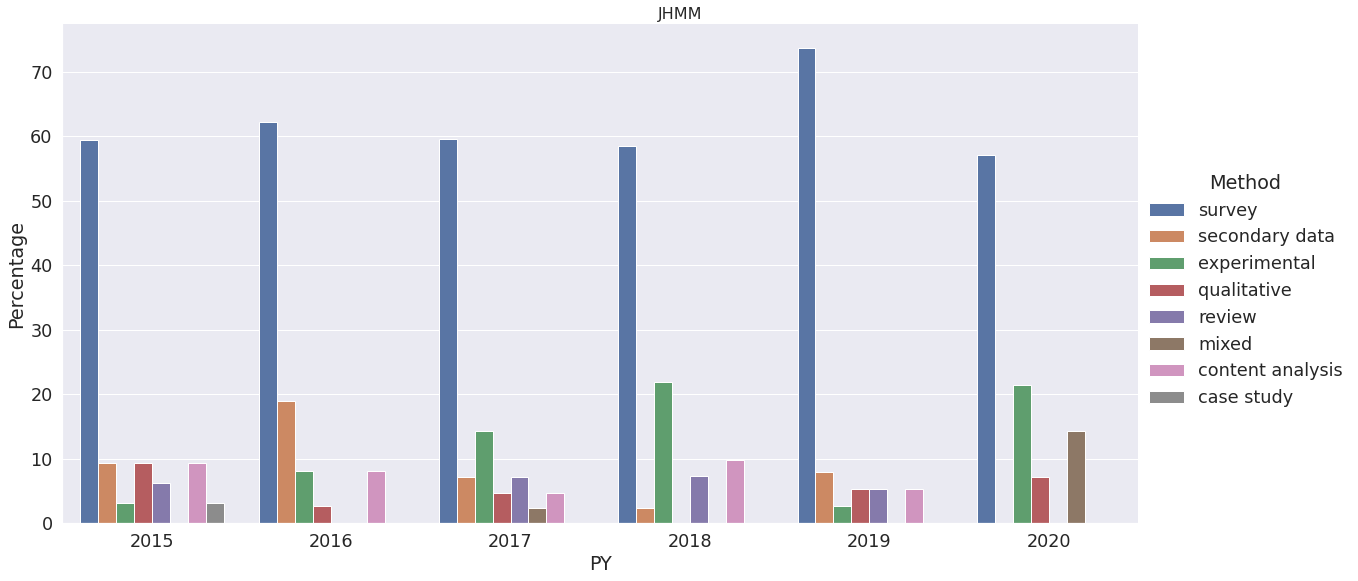

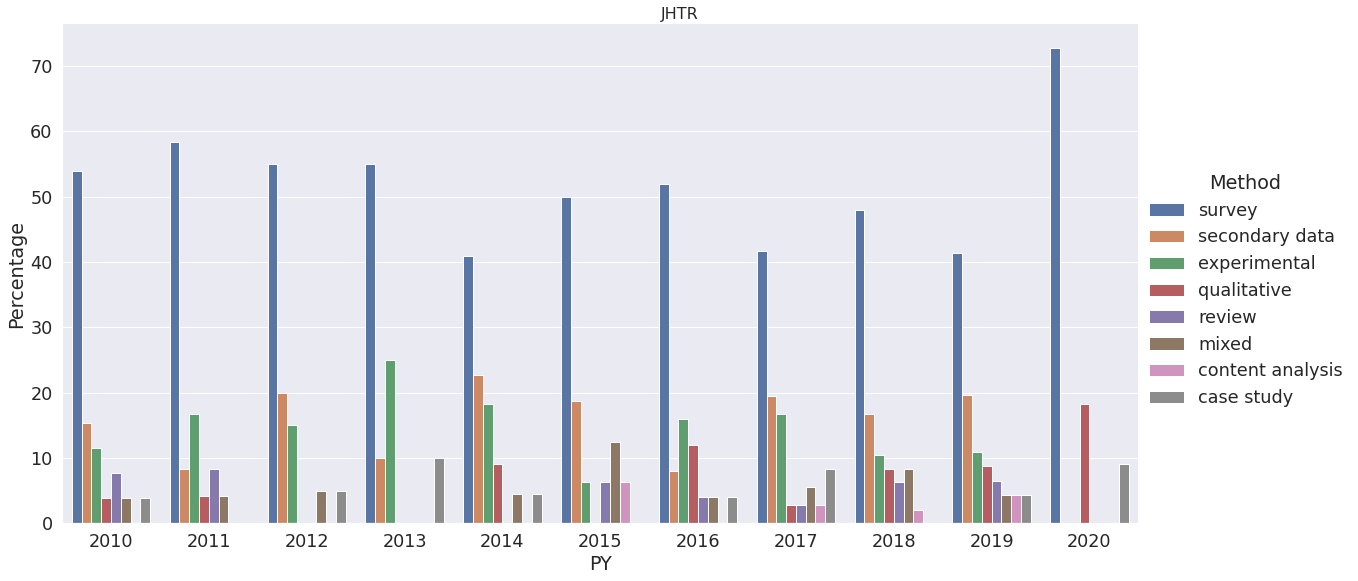

In [281]:
sns.set(font_scale=1.6)
for i in df_2.JO.unique():

  data=df_2.query(f"JO == '{i}'")
  ax = sns.catplot(x="PY", y= "Percentage", hue="Method", data=data, kind="bar", height=8, aspect=2, ci=None, hue_order=order);

  ax.fig.subplots_adjust(top=0.95)
  ax.fig.suptitle(i, fontsize=16, fontdict={"weight": "bold"});
  


In [ ]:
# sns.set(font_scale=3)

# sns.catplot(x="PY", y= "Percentage", hue="Method", data=df_2, col="JO", col_wrap=2, kind="bar", height=20, aspect=2, ci=None);

In [228]:
# sns.set(font_scale=4)

# sns.catplot(x="PY", y= "TI", hue="Method", data=df_2, kind="bar", height=20, aspect=2, ci=None, col="JO", col_wrap=2);

In [229]:
# for i in df_2.JO.unique():
#   sns.catplot(x="PY", y= "TI", hue="Method", data=df_2.query(f"JO == '{i}'"), kind="bar", height=12, aspect=3, ci=None);